In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# load data 

In [2]:
df=pd.read_csv("Websites Data.csv")
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


# check the columns name


In [3]:
df.columns

Index(['# ----------------------------------------', 'Unnamed: 1',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [4]:
df.isnull().sum()

# ----------------------------------------    0
Unnamed: 1                                    0
Unnamed: 2                                    0
Unnamed: 3                                    0
Unnamed: 4                                    0
Unnamed: 5                                    0
Unnamed: 6                                    0
Unnamed: 7                                    0
Unnamed: 8                                    0
Unnamed: 9                                    0
dtype: int64

In [5]:
df.isnull().sum().value_counts()

0    10
Name: count, dtype: int64

# unnecessary like unnamed columns remove


In [6]:
df.columns=df.iloc[0]


# Reset the unusable columns and write a usable columns

In [7]:

df=df.drop(index=0).reset_index(drop=True)
df.columns=["channel group" , "Datehour" , "Users" , "Sessions" , "Engaged sessions" , "Average engagement time per session	" ,"Engaged sessions per user", "Events per session" ,"Engagement rate" , "Event count"]



In [8]:
df.head()

,channel group,Datehour,Users,Sessions,Engaged sessions,Average engagement time per session\t,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


# check the data types

In [9]:
df.dtypes

channel group                            object
Datehour                                 object
Users                                    object
Sessions                                 object
Engaged sessions                         object
Average engagement time per session\t    object
Engaged sessions per user                object
Events per session                       object
Engagement rate                          object
Event count                              object
dtype: object

In [10]:
df["Datehour"] = pd.to_datetime(df["Datehour"], format="%Y%m%d%H", errors='coerce')

numeric_cols = df.columns.drop(["channel group", "Datehour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df["Hour"] = df["Datehour"].dt.hour


In [11]:
df.head()

,channel group,Datehour,Users,Sessions,Engaged sessions,Average engagement time per session\t,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   channel group                         3182 non-null   object        
 1   Datehour                              3182 non-null   datetime64[ns]
 2   Users                                 3182 non-null   int64         
 3   Sessions                              3182 non-null   int64         
 4   Engaged sessions                      3182 non-null   int64         
 5   Average engagement time per session	  3182 non-null   float64       
 6   Engaged sessions per user             3182 non-null   float64       
 7   Events per session                    3182 non-null   float64       
 8   Engagement rate                       3182 non-null   float64       
 9   Event count                           3182 non-null   int64         
 10  

# 1.Q. What trends do you notice in the number of users and website sessions over time?


In [14]:
sns.set(style="whitegrid")

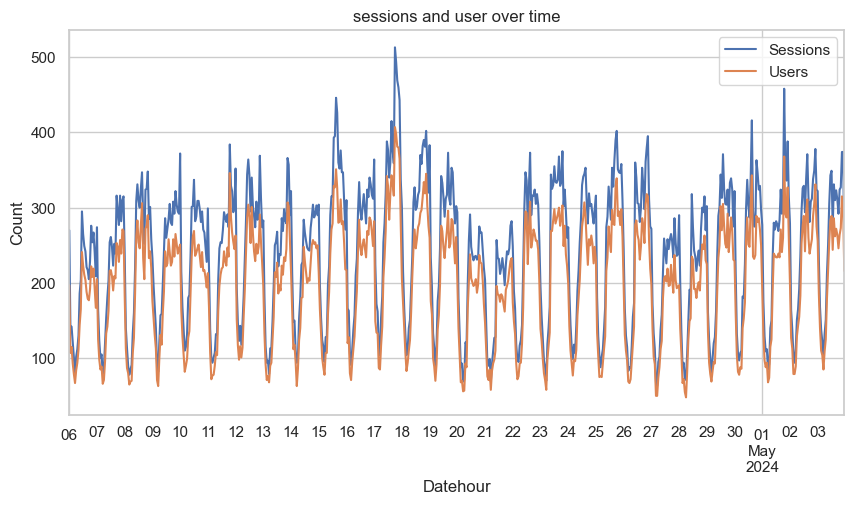

In [17]:
plt.figure(figsize=(10,5))
df.groupby("Datehour") [["Sessions", "Users"]].sum().plot(ax=plt.gca())
plt.title("sessions and user over time")
plt.xlabel("Datehour")
plt.ylabel("Count")
plt.show()


# 🔍conclusions:
The data shows that between May 16 and May 19, there was a noticeable spike in both the number of users and sessions. This means that during these days, not only did more people visit the website, but many of them also returned or interacted multiple times. A similar rise in traffic can also be seen on May 1st and 2nd, where the number of sessions and users again climbed higher than usual. 

# 2.Q .Which marketing channel (like social media, search engines, etc.) brings the most visitors, and how can we use this to improve traffic from other sources?


In [18]:
sns.set(style="whitegrid")

C:\Users\KAMALESH KUMAR\AppData\Local\Temp\ipykernel_20876\1389653219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="channel group", y="Users" ,data=df ,estimator=np.sum, palette="viridis")


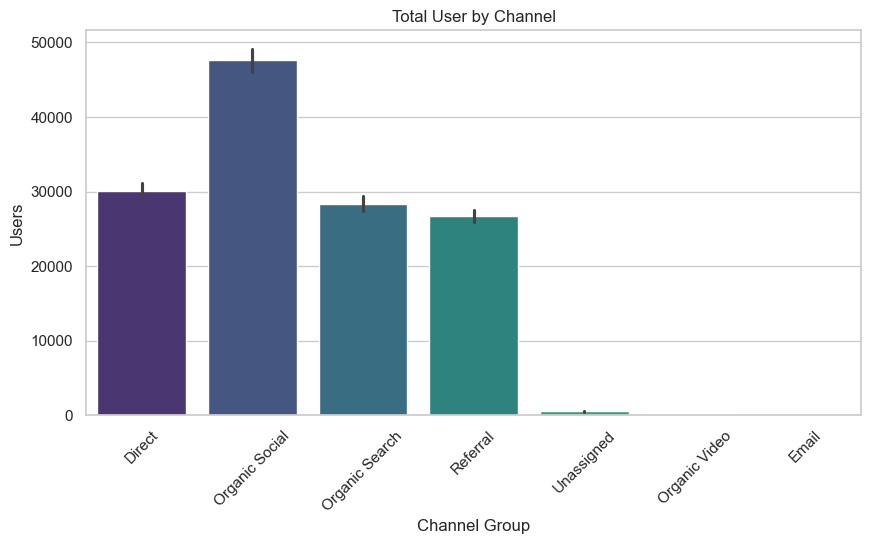

In [25]:
plt.figure(figsize=(10,5)) 
sns.barplot(x="channel group", y="Users" ,data=df ,estimator=np.sum, palette="viridis")# ("estimator=np.sum") means sum of total users
plt.title("Total User by Channel")
plt.xlabel("Channel Group")
plt.ylabel("Users")
plt.xticks(rotation=45)
plt.show()

# 🔍 Conclutions:
The highest number of users came from the Organic Social channel, indicating strong reach and engagement through social media platforms like Instagram, Facebook, and LinkedIn.

Following that, Direct, Organic Search, and Referral channels also performed well. However, Unassigned, Organic Video, and Email channels contributed very little traffic, suggesting a need for improvement or better strategy in those areas.

# 3.Q Which traffic source keeps users engaged the longest, and what does that say about the content or user experience?


C:\Users\KAMALESH KUMAR\AppData\Local\Temp\ipykernel_20876\2671918743.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="channel group", y="Average engagement time per session\t" ,data=df ,estimator=np.mean, palette="magma")# ("estimator=np.mean") jaruri nahi hai likhna yaise bhi angegement time session aa jayega


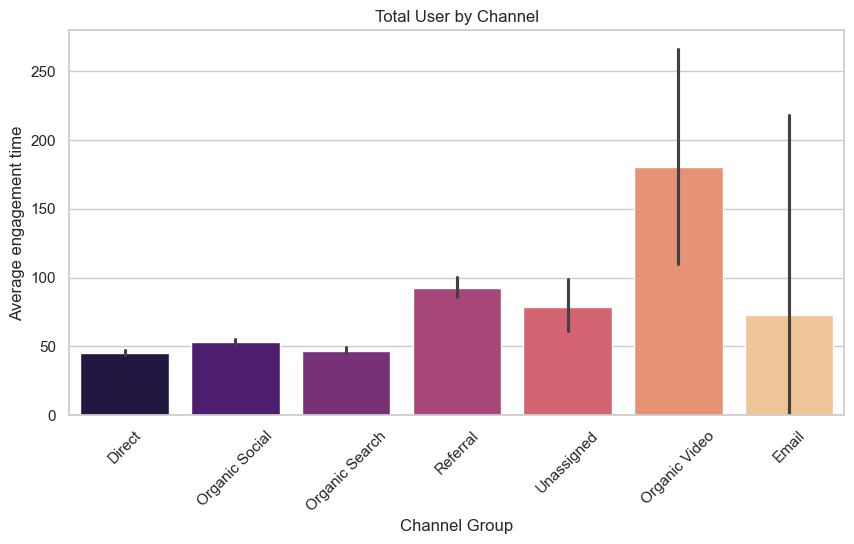

In [33]:
plt.figure(figsize=(10,5)) 
sns.barplot(x="channel group", y="Average engagement time per session\t" ,data=df ,estimator=np.mean, palette="magma")# ("estimator=np.mean") jaruri nahi hai likhna yaise bhi angegement time session aa jayega 
plt.title("Total User by Channel")
plt.xlabel("Channel Group")
plt.ylabel("Average engagement time")
plt.xticks(rotation=45)
plt.show()

In [34]:
df.head()

,channel group,Datehour,Users,Sessions,Engaged sessions,Average engagement time per session\t,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


# 4.Q. How does the engagement rate change across different platforms or traffic channels?

C:\Users\KAMALESH KUMAR\AppData\Local\Temp\ipykernel_20876\2122042378.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="channel group",y="Engagement rate", data=df,palette="magma")


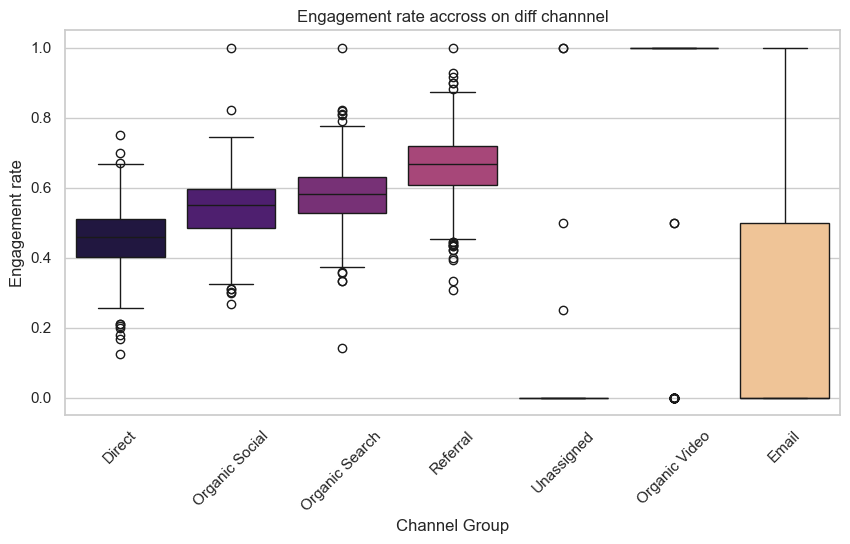

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x="channel group",y="Engagement rate", data=df,palette="magma")
plt.title("Engagement rate accross on diff channnel")
plt.xlabel("Channel Group")
plt.ylabel("Engagement rate")
plt.xticks(rotation=45)
plt.show()


# 🔍 Conclusion
Users from Referral and Organic Search channels engage the most with the website, meaning they are more active and interested.
Organic Social is also doing well.
But Direct, Email, Unassigned, and Organic Video have lower or inconsistent engagement, so these channels need improvement.

# 5) Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can be used to improve engagement in underperforming channels

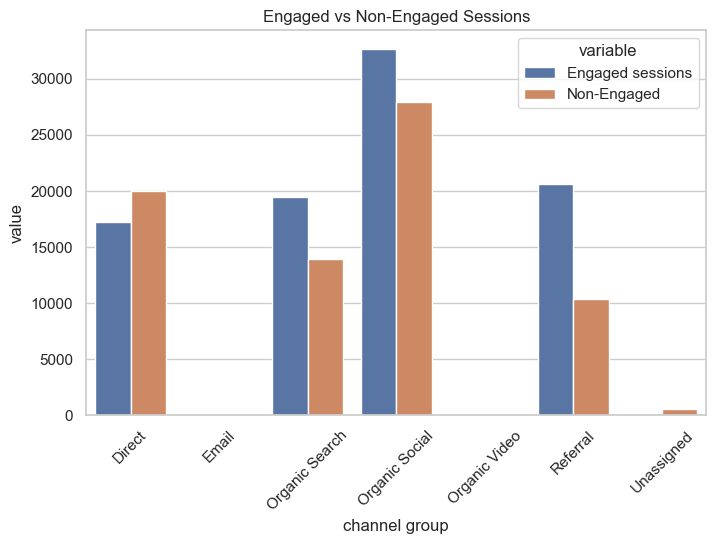

In [40]:
session_df = df.groupby("channel group")[["Sessions", "Engaged sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged sessions"]
session_df_melted = session_df.melt(id_vars="channel group", value_vars=["Engaged sessions", "Non-Engaged"])

plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="channel group", y="value", hue="variable")
plt.title("Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()


# Q.6 At what hours of the day does each channel drive the most traffic?

d:\ANACONDA NAVIGATOR\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


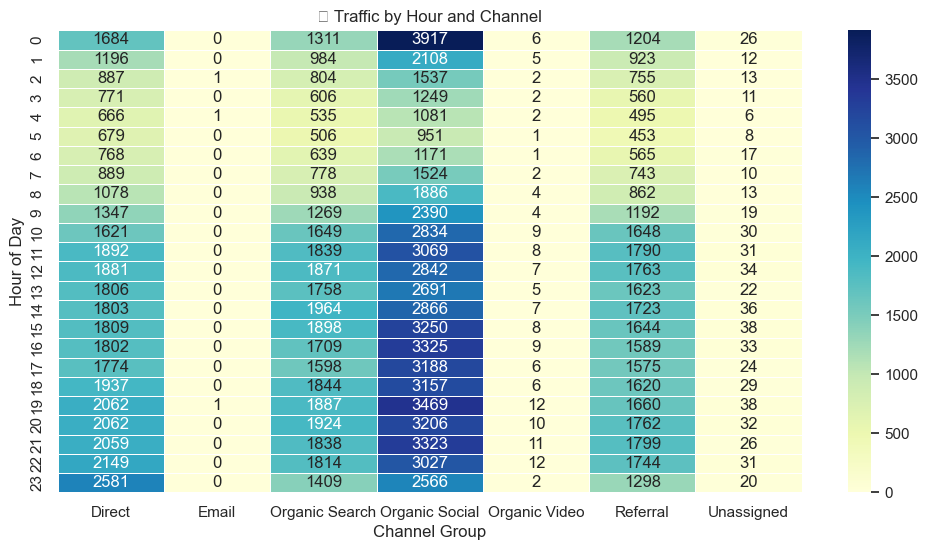

In [42]:
heatmap_data = df.groupby(["Hour", "channel group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("🕒 Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()


# Q.7 Is there a link between a lot of traffic (sessions) and high user engagement?

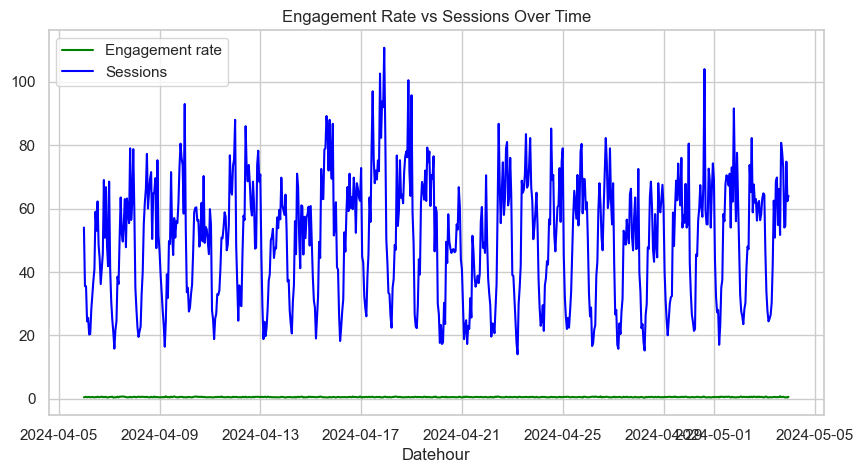

In [45]:
df_plot = df.groupby("Datehour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_plot["Datehour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["Datehour"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title("Engagement Rate vs Sessions Over Time")
plt.xlabel("Datehour")
plt.legend()
plt.grid(True)
plt.show()